# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
np.random.seed(10)

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

In [33]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
c = "faya"
response = requests.get(query_url + c).json()
response['main']['temp_max']
response['main']['humidity']
response['clouds']['all']
response['wind']['speed']
response['sys']['country']
response['sys']['sunrise']

#response

1686105197

In [34]:
#cities


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []
city1 = []
citylat1=[]
citylon1=[]
cityMaxtemp=[]
cityhum=[]
cityclouds=[]
citywind=[]
citycountry=[]
citydate=[]


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
#for city in cities:
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = requests.get(query_url + city).json()
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url['main']['temp']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_url['coord']['lat']
        city_lng = city_url['coord']['lon']
        city_max_temp = city_url['main']['temp_max']
        city_humidity = city_url['main']['humidity']# YOUR CODE HERE
        city_clouds = city_url['clouds']['all']# YOUR CODE HERE
        city_wind = city_url['wind']['speed']# YOUR CODE HERE
        city_country = city_url['sys']['country']# YOUR CODE HERE
        city_date = city_url['sys']['sunrise']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        city1.append(city)
        citylat1.append(city_lat)
        citylon1.append(city_lng)
        cityMaxtemp.append(city_max_temp)
        cityhum.append(city_humidity)
        cityclouds.append(city_clouds)
        citywind.append(city_wind)
        citycountry.append(city_country)
        citydate.append(city_date)

    # If an error is experienced, skip the city
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-dizier
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | eldorado
Processing Record 4 of Set 1 | saint-flour
Processing Record 5 of Set 1 | manokwari
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | balykshi
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | rukban
City not found. Skipping...
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | chunskiy
Processing Record 15 of Set 1 | loikaw
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | yinchuan
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | albany
Processing Rec

In [36]:
city_data


[{'City': 'saint-dizier',
  'Lat': 48.4167,
  'Lng': 5.0833,
  'Max Temp': 19.78,
  'Humidity': 88,
  'Cloudiness': 0,
  'Wind Speed': 2.91,
  'Country': 'FR',
  'Date': 1686109186},
 {'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 2.81,
  'Humidity': 85,
  'Cloudiness': 100,
  'Wind Speed': 7.79,
  'Country': 'TF',
  'Date': 1686193750},
 {'City': 'eldorado',
  'Lat': -23.7869,
  'Lng': -54.2836,
  'Max Temp': 18.16,
  'Humidity': 77,
  'Cloudiness': 0,
  'Wind Speed': 1.83,
  'Country': 'BR',
  'Date': 1686132880},
 {'City': 'saint-flour',
  'Lat': 45.0833,
  'Lng': 3,
  'Max Temp': 12.12,
  'Humidity': 94,
  'Cloudiness': 86,
  'Wind Speed': 1.08,
  'Country': 'FR',
  'Date': 1686110517},
 {'City': 'manokwari',
  'Lat': -0.8667,
  'Lng': 134.0833,
  'Max Temp': 25.49,
  'Humidity': 80,
  'Cloudiness': 57,
  'Wind Speed': 1.54,
  'Country': 'ID',
  'Date': 1686171634},
 {'City': 'edinburgh of the seven seas',
  'Lat': -37.0676,
  'Lng': -12.3116,
  'Max

In [37]:
#city_data
city_dict = {
    "City": city1, 
    "Lat": citylat1, 
    "Lng": citylon1, 
    "Max Temp": cityMaxtemp,
    "Humidity": cityhum,
    "Cloudiness": cityclouds,
    "Wind Speed": citywind,
    "Country": citycountry,
    "Date": citydate}

city_data_df = pd.DataFrame(city_dict)
city_data_df.head()
#city_data[city]
#city_data[0]['City']

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-dizier,48.4167,5.0833,19.78,88,0,2.91,FR,1686109186
1,port-aux-francais,-49.3500,70.2167,2.81,85,100,7.79,TF,1686193750
2,eldorado,-23.7869,-54.2836,18.16,77,0,1.83,BR,1686132880
3,saint-flour,45.0833,3.0000,12.12,94,86,1.08,FR,1686110517
4,manokwari,-0.8667,134.0833,25.49,80,57,1.54,ID,1686171634


In [59]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)  

# Show Record Count
city_data_df.count()


City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-dizier,48.4167,5.0833,19.78,88,0,2.91,FR,1686109186
1,port-aux-francais,-49.3500,70.2167,2.81,85,100,7.79,TF,1686193750
2,eldorado,-23.7869,-54.2836,18.16,77,0,1.83,BR,1686132880
3,saint-flour,45.0833,3.0000,12.12,94,86,1.08,FR,1686110517
4,manokwari,-0.8667,134.0833,25.49,80,57,1.54,ID,1686171634


In [40]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [41]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities1.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,13.11,66,99,9.63,SH,1686038200
1,college,64.8569,-147.8028,24.70,37,20,0.45,US,1686050304
2,markovo,57.3206,107.0881,4.69,76,78,0.84,RU,1686081531
3,yellowknife,62.4560,-114.3525,10.29,100,100,6.17,CA,1686045006
4,lebu,-37.6167,-73.6500,13.24,81,100,3.16,CL,1686053016


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

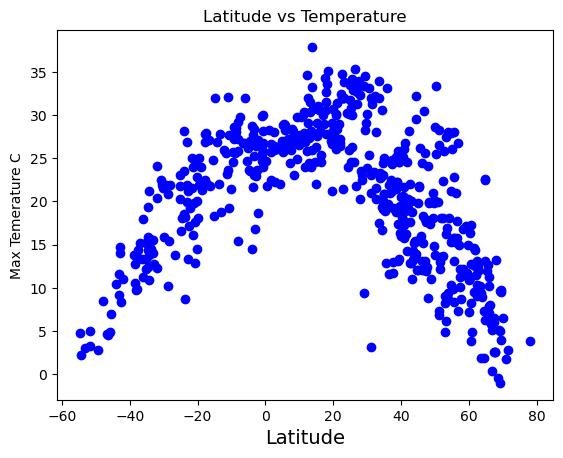

In [42]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(citylat1,cityMaxtemp, color="blue")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Max Temerature C')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
#plt.show()

#### Latitude Vs. Humidity

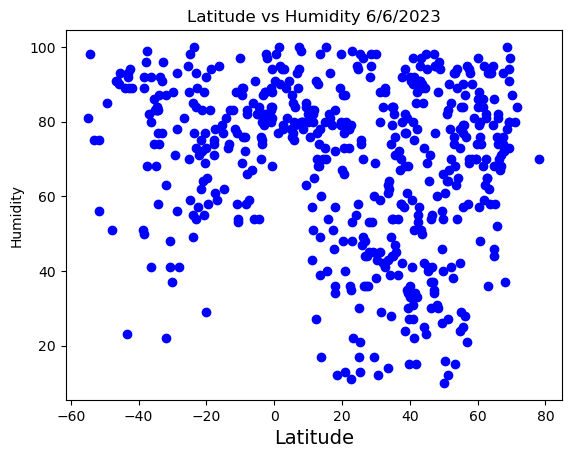

In [43]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(citylat1,cityhum, color="blue")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Latitude vs Humidity 6/6/2023')
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

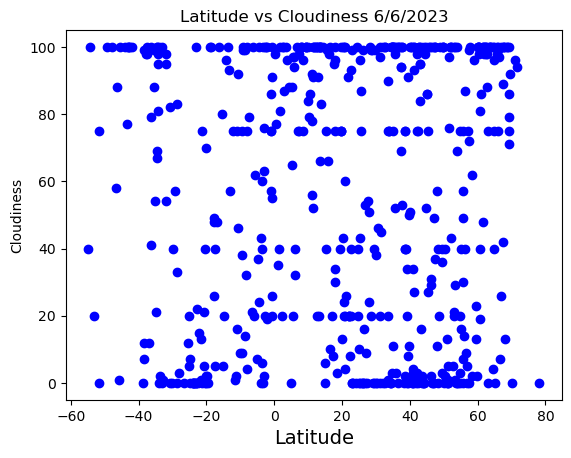

In [44]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(citylat1, cityclouds, color="blue")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Latitude vs Cloudiness 6/6/2023')
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Cloudiness')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

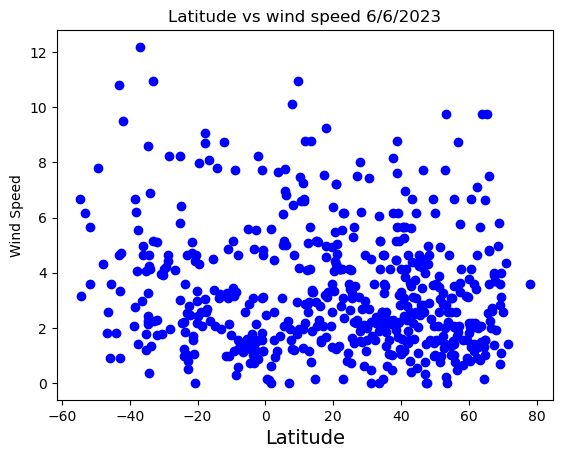

In [45]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(citylat1,citywind, color="blue")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Latitude vs wind speed 6/6/2023')
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [47]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 608
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        609 non-null    object 
 1   Lat         609 non-null    float64
 2   Lng         609 non-null    float64
 3   Max Temp    609 non-null    float64
 4   Humidity    609 non-null    int64  
 5   Cloudiness  609 non-null    int64  
 6   Wind Speed  609 non-null    float64
 7   Country     604 non-null    object 
 8   Date        609 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 47.6+ KB


In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df.Lat > 0]
# Display sample data
northern_hemi_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,college,64.8569,-147.8028,24.70,37,20,0.45,US,1686050304
2,markovo,57.3206,107.0881,4.69,76,78,0.84,RU,1686081531
3,yellowknife,62.4560,-114.3525,10.29,100,100,6.17,CA,1686045006
8,gaalkacyo,6.7697,47.4308,28.30,60,97,8.87,SO,1686018843
10,ribeira grande,38.5167,-28.7000,20.22,64,40,9.83,PT,1686033070
...,...,...,...,...,...,...,...,...,...
601,misratah,32.3754,15.0925,21.35,70,100,7.55,LY,1686023561
604,slutsk,53.0274,27.5597,13.66,66,0,3.43,BY,1686016012
605,alaghsas,17.0187,8.0168,35.68,12,11,3.35,NE,1686027215


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df.Lat < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,13.11,66,99,9.63,SH,1686038200
4,lebu,-37.6167,-73.6500,13.24,81,100,3.16,CL,1686053016
5,ushuaia,-54.8000,-68.3000,6.79,87,20,8.23,AR,1686055759
6,mar del plata,-38.0023,-57.5575,16.72,85,100,8.75,AR,1686049216
7,adamstown,-25.0660,-130.1015,21.16,56,57,7.51,PN,1686064813


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5724699323091383


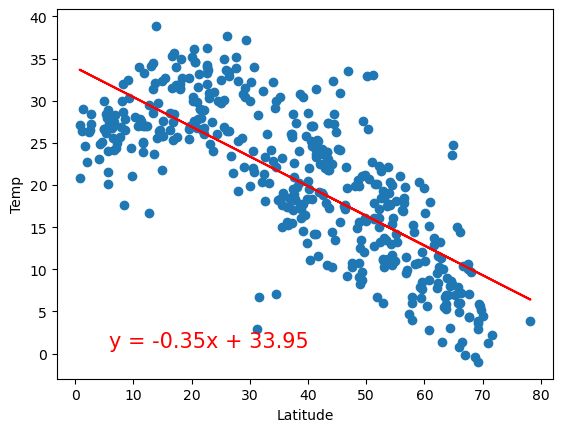

In [50]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6161043310930298


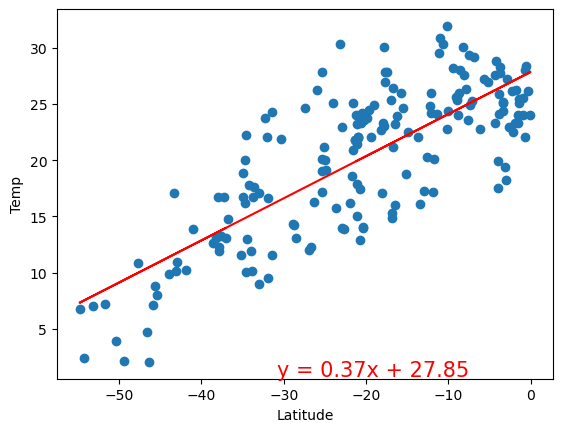

In [51]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0004024145499914051


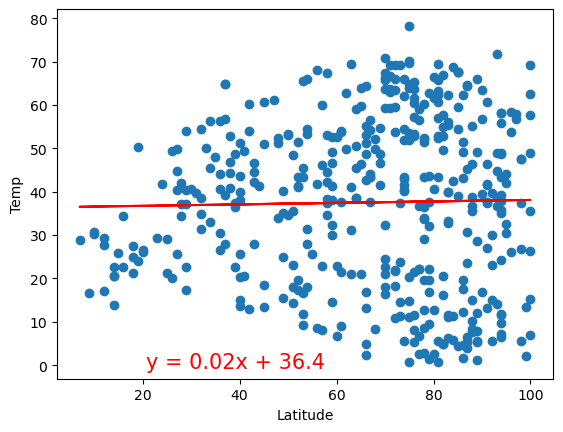

In [52]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20.8,-0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.011450089318136328


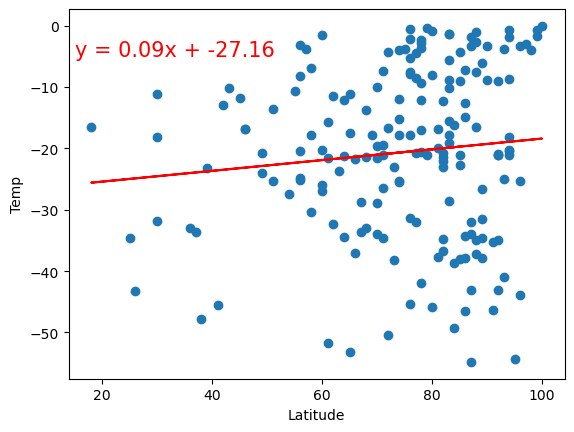

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,-5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.014275844349109947


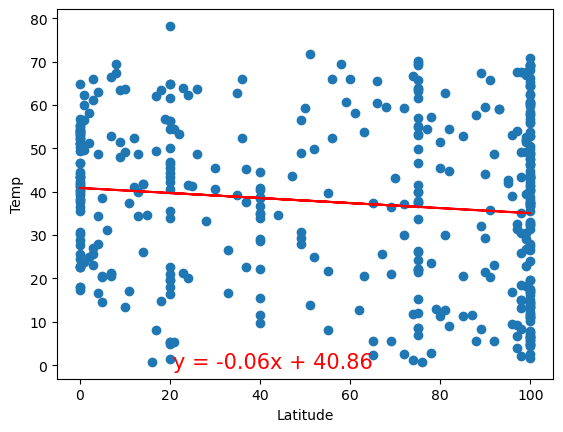

In [54]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Cloudiness']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20.8,-0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00041926472451274193


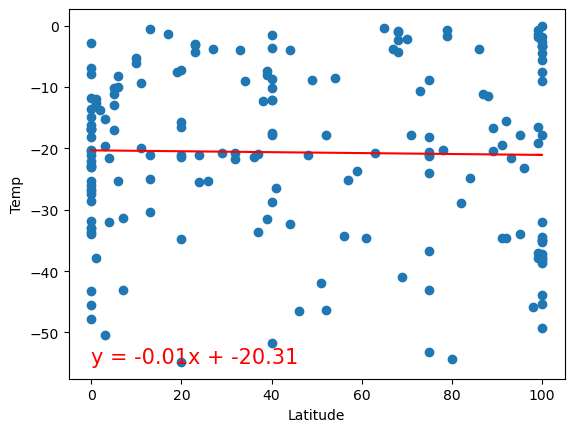

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df['Cloudiness']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0033398805049978876


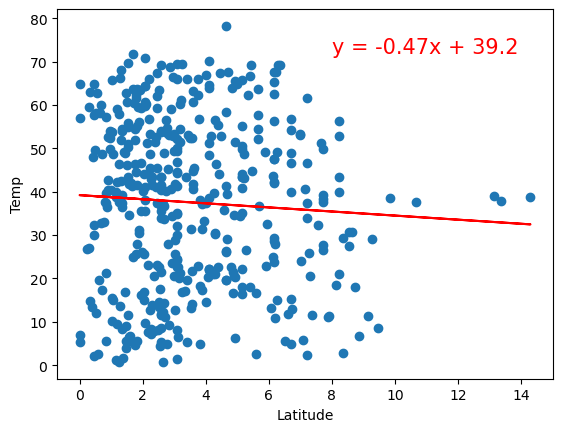

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df['Wind Speed']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,72),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.10709598320759377


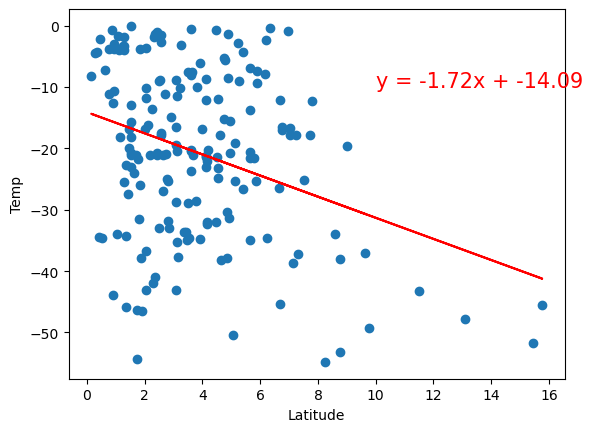

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE